In [195]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [196]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [197]:
from astropy.table    import Table
from cosmo            import cosmo, fsky
from gama_limits      import gama_field
#from jackknife_limits import jk_field
from findfile         import findfile
import pubplot

In [198]:
survey = 'gama'
version = 'GAMA4'

In [116]:
# TODO: Fix
#fpath = findfile(ftype='ddp_n8', survey=survey, version=version)
#dat = Table.read(fpath)

dat = Table.read(os.environ['CSCRATCH'] + '/norberg/GAMA4/gama_gold_ddp_n8.fits')

KeyError: 'CSCRATCH'

In [5]:
isin = gama_field(dat['RA'], dat['DEC']) == 'G9'
G9 = dat[isin]

isin = gama_field(dat['RA'], dat['DEC']) == 'G12'
G12 = dat[isin]

isin = gama_field(dat['RA'], dat['DEC']) == 'G15'
G15 = dat[isin]

In [6]:
jk_field(G9['RA'], G9['DEC'])

array(['JK1', 'JK0', 'JK0', ..., 'JK2', 'JK0', 'JK2'], dtype='<U4')

In [7]:
jk_field(G12['RA'], G12['DEC'])

array(['JK4', 'JK5', 'JK5', ..., 'JK3', 'JK5', 'JK4'], dtype='<U4')

In [8]:
jk_field(G15['RA'], G15['DEC'])

array(['JK7', 'JK7', 'JK6', ..., 'JK6', 'JK6', 'JK6'], dtype='<U4')

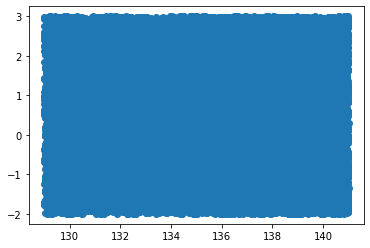

In [9]:
plt.scatter(G9['RA'], G9['DEC'])

In [10]:
isin = jk_field(dat['RA'], dat['DEC']) == 'JK0'
JK0 = dat[isin]

isin = jk_field(dat['RA'], dat['DEC']) == 'JK1'
JK1 = dat[isin]

isin = jk_field(dat['RA'], dat['DEC']) == 'JK2'
JK2 = dat[isin]

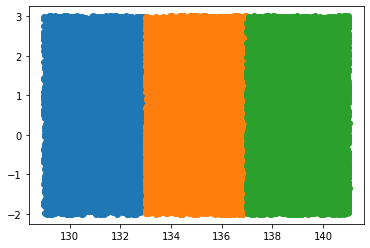

In [11]:
plt.scatter(JK0['RA'], JK0['DEC'])
plt.scatter(JK1['RA'], JK1['DEC'])
plt.scatter(JK2['RA'], JK2['DEC'])

In [235]:
fpath = findfile(ftype='lumfn', version=version, survey=survey)
lumfn = Table.read(fpath, hdu=1)

In [236]:
# TODO: take from header.
jackknife = 15

/tmp/ipykernel_32369/2535702805.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=lumfn['PHI_IVMAX_ERROR_JK'])


Text(0.5, 1.0, 'GAMA')

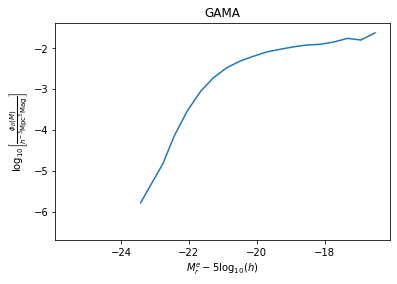

In [237]:
plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=lumfn['PHI_IVMAX_ERROR_JK'])
plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
plt.title(survey.upper())

/tmp/ipykernel_32369/3664981707.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_ERROR_JK']))


Text(0.5, 1.0, 'GAMA')

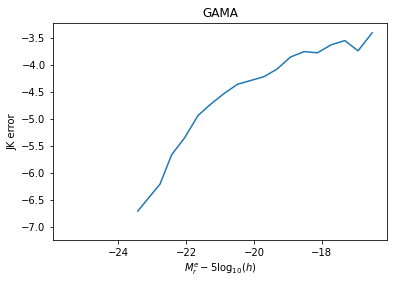

In [243]:
plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_ERROR_JK']))
plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel('JK error')
plt.title(survey.upper())

/tmp/ipykernel_32369/658572011.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=np.log10(lumfn['PHI_IVMAX_ERROR_JK'])/15)
/cosma/home/durham/dc-moor2/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


<ErrorbarContainer object of 3 artists>

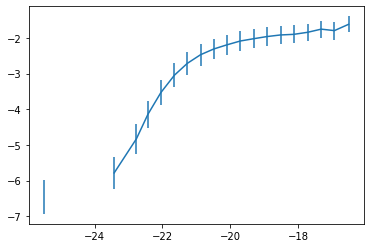

In [244]:
plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=np.log10(lumfn['PHI_IVMAX_ERROR_JK'])/15)

/tmp/ipykernel_32369/1766159337.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=np.log10(lumfn['PHI_IVMAX_ERROR_JK'])/15)
/cosma/home/durham/dc-moor2/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


Text(0.5, 1.0, 'GAMA')

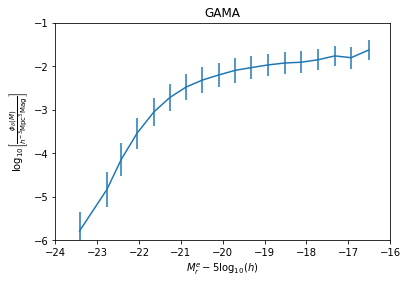

In [246]:
plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=np.log10(lumfn['PHI_IVMAX_ERROR_JK'])/15)
plt.xlim(-24, -16)
plt.ylim(-6, -1)
plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
plt.title(survey.upper())

/tmp/ipykernel_32369/3372993061.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_32369/3372993061.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_32369/3372993061.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_32369/3372993061.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_32369/3372993061.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_32369/3372993061.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))
/tmp/ipykernel_32369/3372993061.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot

Text(0, 0.5, '$\\log_{10} \\left[ \\frac{\\phi_\\delta(M)}{h^{-3} {\\rm Mpc}^{3} {\\rm Mag}^{}} \\right] $')

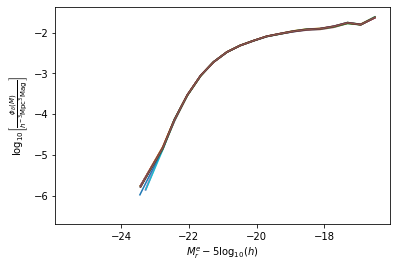

In [240]:
for idx in range(1, jackknife+1):
    lumfn = Table.read(fpath, hdu=idx)
    plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']))

lumfn = Table.read(fpath, hdu=1)
plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), color='black')
plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=lumfn['PHI_IVMAX_ERROR_JK']*15)

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')

/tmp/ipykernel_32369/2467248586.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=lumfn['PHI_IVMAX_ERROR'], label='d{}'.format(utier))
/tmp/ipykernel_32369/2467248586.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=lumfn['PHI_IVMAX_ERROR'], label='d{}'.format(utier))
/tmp/ipykernel_32369/2467248586.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=lumfn['PHI_IVMAX_ERROR'], label='d{}'.format(utier))
/tmp/ipykernel_32369/2467248586.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=lumfn['PHI_IVMAX_ERROR'], label='d{}'.format(utier))


Text(0.5, 1.0, 'GAMA')

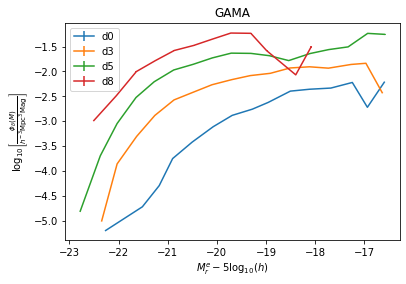

In [205]:
'''
d8 JK work here
'''
# TODO: take from header.
jackknife = 15

for utier in [0, 3, 5, 8]:
    fpath = '/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(utier)
    lumfn = Table.read(fpath, hdu=1)


    plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=lumfn['PHI_IVMAX_ERROR'], label='d{}'.format(utier))

plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
plt.legend()
plt.title(survey.upper())

/tmp/ipykernel_32369/1832181536.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=np.log10(lumfn['PHI_IVMAX_ERROR']) / 15, ls='--', c=colors[utier])
/cosma/home/durham/dc-moor2/.local/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/tmp/ipykernel_32369/1832181536.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']), color=colors[utier])
/tmp/ipykernel_32369/1832181536.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']), color=colors[utier])
/tmp/ipykernel_32369/1832181536.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']), color=colors[utier])
/tmp/ipykernel_32369/1832181536.py:21: Runt

Text(0.5, 1.0, 'GAMA')

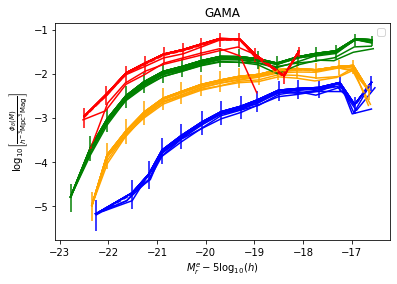

In [231]:
'''
d8 JK work here
'''

#colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors    = ['blue', 'blue', 'x', 'orange', 'x', 'green', 'x', 'x', 'red']

# TODO: take from header.
jackknife = 15

for utier in [0, 3, 5, 8]:
    
    fpath = '/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(utier)
    lumfn = Table.read(fpath, hdu=1)
    plt.errorbar(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX_JK']), yerr=np.log10(lumfn['PHI_IVMAX_ERROR']) / 15, ls='--', c=colors[utier])

    
    for hdu in range(2, jackknife):
        fpath = '/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(utier)
        lumfn = Table.read(fpath, hdu=hdu)
        plt.plot(lumfn['MEDIAN_M'], np.log10(lumfn['PHI_IVMAX']), color=colors[utier])
    
plt.xlabel(r'$M_r^e - 5 \log_{10}(h)$')
plt.ylabel(r'$\log_{10} \left[ \frac{\phi_\delta(M)}{h^{-3} {\rm Mpc}^{3} {\rm Mag}^{}} \right] $')
plt.legend()
plt.title(survey.upper())

In [194]:
fpath = '/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(utier)
lumfn = Table.read(fpath, hdu=1)
lumfn.meta

OrderedDict([('AREA', '60.0'),
             ('GOLD_NGAL', '113687'),
             ('IMMUTABLE', 'False'),
             ('THETA_DEF', 'Z_THETA_QCOLOR'),
             ('DDP1_ZMIN', '0.0390699990093708'),
             ('DDP1_ZMAX', '0.2629899978637695'),
             ('DDP1_VZ', '7594754.153764196'),
             ('DDP1ZLIMS_NGAL', '113687'),
             ('DDP1_NGAL', '45293'),
             ('DDP1_DENS', '0.005963721679858641'),
             ('DDP2_ZMIN', '0.03914999961853027'),
             ('DDP2_ZMAX', '0.1937000006437302'),
             ('DDP2_VZ', '3156659.558717707'),
             ('DDP2ZLIMS_NGAL', '73942'),
             ('DDP2_NGAL', '33396'),
             ('DDP2_DENS', '0.01057953807776663'),
             ('DDP3_ZMIN', '0.03903000056743622'),
             ('DDP3_ZMAX', '0.1015800014138222'),
             ('DDP3_VZ', '457819.2340050841'),
             ('DDP3ZLIMS_NGAL', '18121'),
             ('DDP3_NGAL', '8842'),
             ('DDP3_DENS', '0.01931329953669401'),
             (

In [141]:
fpath

'/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_G9_ddp_n8_d0_8_lumfn.fits'

In [169]:
lumfn = Table.read(fpath, hdu=hdu)
lumfn

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.3,0.0,0.0,0.0,0.0,0.0,0.0
-24.900000000000002,0.0,0.0,0.0,0.0,0.0,0.0
-24.500000000000004,0.0,0.0,0.0,0.0,0.0,0.0
-24.100000000000005,0.0,0.0,0.0,0.0,0.0,0.0
-23.700000000000006,0.0,0.0,0.0,0.0,0.0,0.0
-23.300000000000008,0.0,0.0,0.0,0.0,0.0,0.0
-22.90000000000001,0.0,0.0,0.0,0.0,0.0,0.0
-22.50000000000001,0.0,0.0,0.0,0.0,0.0,0.0
-22.100000000000012,0.0,0.0,0.0,0.0,0.0,0.0
